## Categorical Plot


### seaborn.boxplot
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

saturationfloat, optional
Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.

widthfloat, optional
Width of a full element when not using hue nesting, or width of all the elements for one level of the major grouping variable.

dodgebool, optional
When hue nesting is used, whether elements should be shifted along the categorical axis.

fliersizefloat, optional
Size of the markers used to indicate outlier observations.

linewidthfloat, optional
Width of the gray lines that frame the plot elements.

whisfloat, optional
Proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed through to matplotlib.axes.Axes.boxplot().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a single horizontal boxplot:

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

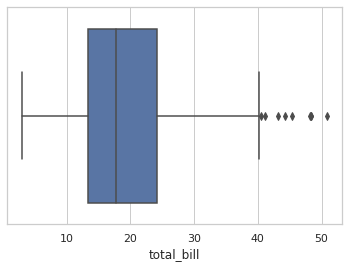

In [3]:
sns.boxplot(x=tips['total_bill'])
plt.show()

Draw a vertical group by box plot

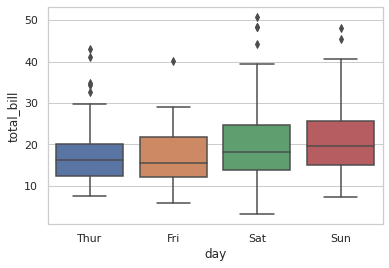

In [4]:
ax = sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

Draw a boxplot with nested grouping by two categorical variables:

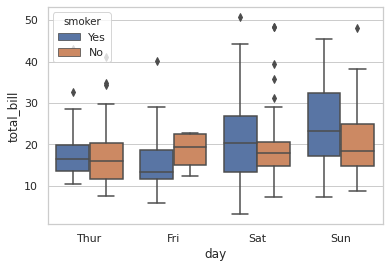

In [5]:
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)
plt.show()

Draw a boxplot with nested grouping when some bins are empty:

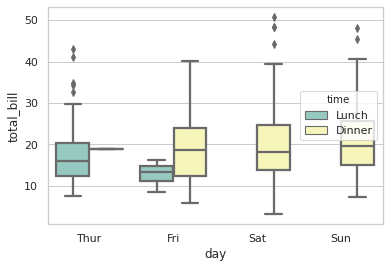

In [17]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips, linewidth=2.25, palette='Set3')
plt.show()

Control box order by passing an explicit order:

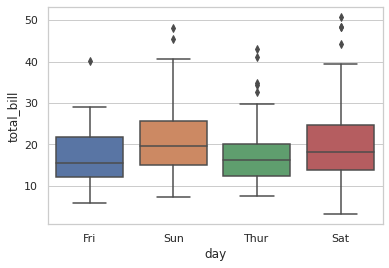

In [18]:
ax = sns.boxplot(x='day', y='total_bill', data=tips, order=['Fri', 'Sun', 'Thur', 'Sat'])
plt.show()

Draw a boxplot for each numeric variable in a DataFrame:

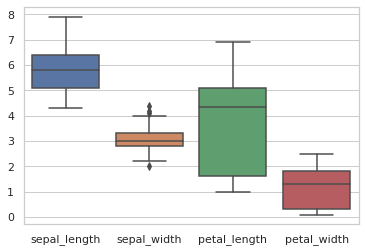

In [19]:
iris = sns.load_dataset('iris')
sns.boxplot(data=iris)

Use hue without changing box position or width:



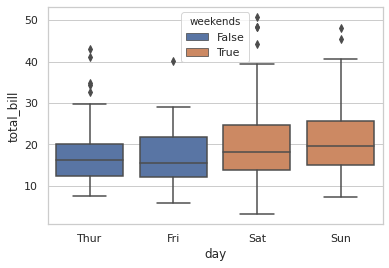

In [21]:
tips['weekends'] = tips['day'].isin(['Sat', 'Sun'])
sns.boxplot(x='day', y='total_bill', data=tips, hue='weekends', dodge=False)
plt.show()

Use swarmplot() to show the datapoints on top of the boxes:

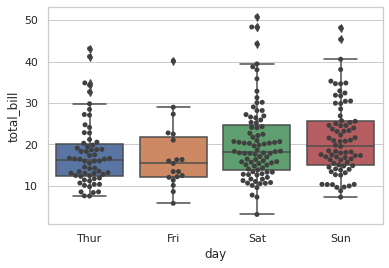

In [25]:
ax = sns.boxplot(x='day', y='total_bill', data=tips)
ax = sns.swarmplot(x='day', y='total_bill', data=tips, color='0.25')
plt.show()

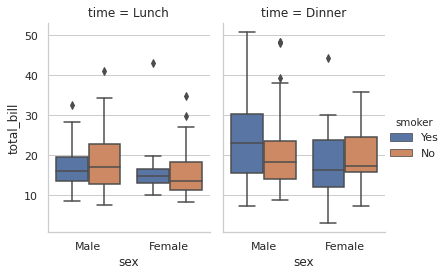

In [26]:
#Use catplot() to combine a boxplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);